In [1]:
#Used for creating the train and validation data
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

Normalization/standardization. Specifiying the test and training data.

In [2]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

df[varlist] = df[varlist].apply(binary_map)

# specify this so that the train and test data set always have the same rows
# 80% and 20% split between training and evaluation (test) sets across all problems
np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train.pop('price')
y_val = df_val.pop('price')

Training and Validation Function model using gradient descent.

In [3]:
def train_model(inputs, df_train, df_val, y_train, y_val, learning_rate, iterations):

    #Split the data into training and validation sets
    x_train = df_train[inputs]
    x_b_train = np.c_[np.ones((len(x_train), 1)), x_train]

    x_val = df_val[inputs]
    x_b_val = np.c_[np.ones((len(x_val), 1)), x_val]

    n = x_b_train.shape[1]
    m_train = len(x_b_train)
    m_val = len(x_b_val)
    theta = np.zeros(n)

    train_losses = []
    val_losses = []

    for iterations in range(iterations):

        h_theta = x_b_train.dot(theta)
        error = np.subtract(h_theta, y_train)

        gradient = (1 / m_train) * (x_b_train.T.dot(error))
        theta -= learning_rate * gradient

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        val_loss = 1 / (2 * m_val) * np.sum(np.square((x_b_val.dot(theta) - y_val)))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

Problem 1.a

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


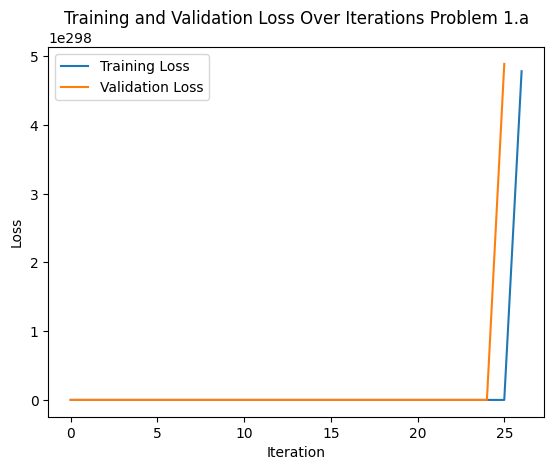

In [11]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = 0.01
iterations = 50

train_losses, valid_losses = train_model(inputs, df_train, df_val, y_train, y_val, learning_rate, iterations)

# Plot the losses
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations Problem 1.a")
plt.show()

Problem 1.b


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


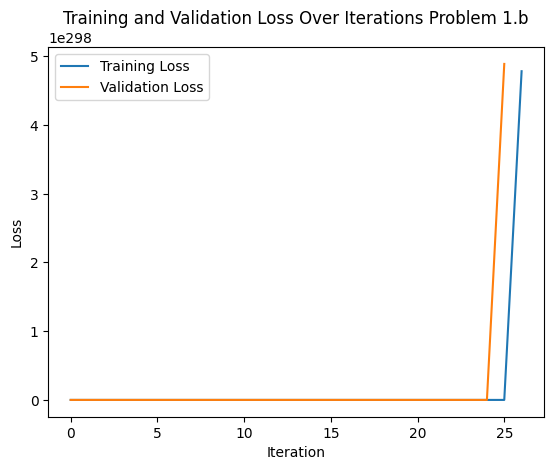

In [10]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

learning_rate = 0.01
iterations = 50

train_losses, valid_losses = train_model(inputs, df_train, df_val, y_train, y_val, learning_rate, iterations)

# Plot the losses
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations Problem 1.b")
plt.show()